In [40]:
import tensorflow as tf
from tensorflow import keras

In [41]:
model = keras.models.load_model('xception_v4_1_13_0.970.h5.keras')

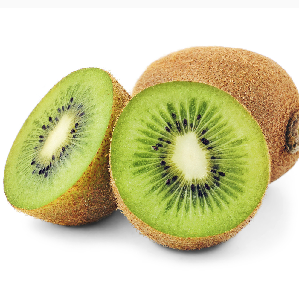

In [42]:
import numpy as np
from keras.preprocessing.image import load_img
from keras.applications.xception import preprocess_input
 
# Reading the image
img = load_img('./capstone-project/test/kiwi/Image_4.jpg', target_size=(299,299))
img

In [43]:
# Preprocessing the image
x = np.array(img)
# Turning this image into a batch of one image
X = np.array([x])
 
X = preprocess_input(X)
X

array([[[[0.9607843, 0.9607843, 0.9607843],
         [0.9607843, 0.9607843, 0.9607843],
         [0.9607843, 0.9607843, 0.9607843],
         ...,
         [0.9607843, 0.9607843, 0.9607843],
         [0.9607843, 0.9607843, 0.9607843],
         [0.9607843, 0.9607843, 0.9607843]],

        [[0.9607843, 0.9607843, 0.9607843],
         [0.9607843, 0.9607843, 0.9607843],
         [0.9607843, 0.9607843, 0.9607843],
         ...,
         [0.9607843, 0.9607843, 0.9607843],
         [0.9607843, 0.9607843, 0.9607843],
         [0.9607843, 0.9607843, 0.9607843]],

        [[0.9607843, 0.9607843, 0.9607843],
         [0.9607843, 0.9607843, 0.9607843],
         [0.9607843, 0.9607843, 0.9607843],
         ...,
         [0.9607843, 0.9607843, 0.9607843],
         [0.9607843, 0.9607843, 0.9607843],
         [0.9607843, 0.9607843, 0.9607843]],

        ...,

        [[1.       , 1.       , 1.       ],
         [1.       , 1.       , 1.       ],
         [1.       , 1.       , 1.       ],
         ...,


In [44]:
classes = ['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'kiwi',
 'lemon',
 'lettuce',
 'onion',
 'orange',
 'pear',
 'peas',
 'pineapple',
 'potato',
 'spinach',
 'sweetcorn',
 'tomato',
 'watermelon']

In [45]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
 
tflite_model = converter.convert()
 
# Saving the model
with open('fruit-model.tflite', 'wb') as f_out:
    f_out.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpw3g19avx/assets


INFO:tensorflow:Assets written to: /tmp/tmpw3g19avx/assets


Saved artifact at '/tmp/tmpw3g19avx'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name='input_layer_43')
Output Type:
  TensorSpec(shape=(None, 27), dtype=tf.float32, name=None)
Captures:
  140152097047568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140152097048912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140152097049104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140152097048720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140152097048144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140152097049488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140152097050832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140152097051024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140152097050640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140152097049872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14015209705

W0000 00:00:1738026661.661258     324 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1738026661.661286     324 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-01-28 01:11:01.661484: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpw3g19avx
2025-01-28 01:11:01.674129: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-01-28 01:11:01.674156: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmpw3g19avx
2025-01-28 01:11:01.804683: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-01-28 01:11:02.628285: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmpw3g19avx
2025-01-28 01:11:02.807812: I tensorflow/cc/saved_model/loader.cc:466] SavedModel load for tags { serve }; Status: success: OK. Took 1146330 microseconds.


In [46]:

import tensorflow.lite as tflite
 
interpreter = tflite.Interpreter(model_path='fruit-model.tflite')
# Loading weights from the model to the memory
interpreter.allocate_tensors()

In [47]:
# Figuring out the input
interpreter.get_input_details()

[{'name': 'serving_default_input_layer_43:0',
  'index': 0,
  'shape': array([  1, 299, 299,   3], dtype=int32),
  'shape_signature': array([ -1, 299, 299,   3], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [48]:
interpreter.get_input_details()[0]['index']

0

In [49]:
input_index = interpreter.get_input_details()[0]['index']

In [50]:
# Needing also index of the output
interpreter.get_output_details()

[{'name': 'StatefulPartitionedCall_1:0',
  'index': 229,
  'shape': array([ 1, 27], dtype=int32),
  'shape_signature': array([-1, 27], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [51]:

interpreter.get_output_details()[0]['index']

229

In [52]:
output_index = interpreter.get_output_details()[0]['index']

In [53]:
interpreter.set_tensor(input_index, X)

In [54]:
# Invoking the computations in the neural network
interpreter.invoke()

In [55]:
# Results are in the output_index, so fetching the results...
preds = interpreter.get_tensor(output_index)
preds

array([[  6.20007   ,  -4.796222  ,  -6.723799  , -12.462005  ,
         -7.891367  ,  -3.431067  ,  -5.770812  ,  -9.472983  ,
         -4.8826923 ,  -7.7476535 , -10.008167  ,  -9.661958  ,
         -7.276209  ,  -5.662862  ,  18.213854  ,  -0.42361864,
         -4.3787217 ,  -7.5834246 ,   2.839791  ,  -5.977159  ,
         -2.7124088 ,  -2.6450078 ,  -4.7781124 ,  -6.949143  ,
         -6.451705  ,  -1.5306563 ,   1.2204791 ]], dtype=float32)

In [56]:
dict(zip(classes, preds[0]))

{'apple': 6.20007,
 'banana': -4.796222,
 'beetroot': -6.723799,
 'bell pepper': -12.462005,
 'cabbage': -7.891367,
 'capsicum': -3.431067,
 'carrot': -5.770812,
 'cauliflower': -9.472983,
 'corn': -4.8826923,
 'cucumber': -7.7476535,
 'eggplant': -10.008167,
 'garlic': -9.661958,
 'ginger': -7.276209,
 'grapes': -5.662862,
 'kiwi': 18.213854,
 'lemon': -0.42361864,
 'lettuce': -4.3787217,
 'onion': -7.5834246,
 'orange': 2.839791,
 'pear': -5.977159,
 'peas': -2.7124088,
 'pineapple': -2.6450078,
 'potato': -4.7781124,
 'spinach': -6.949143,
 'sweetcorn': -6.451705,
 'tomato': -1.5306563,
 'watermelon': 1.2204791}

In [57]:
#two functions above are from keras which lives in tensorflow. We dont want tensorflow but tflite

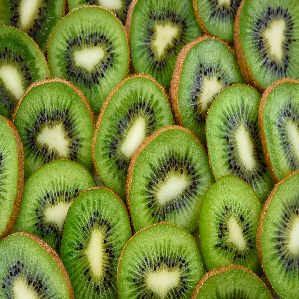

In [58]:
from PIL import Image
 
with Image.open('./capstone-project/test/kiwi/Image_2.jpg') as img:
    img = img.resize((299, 299), Image.NEAREST)
 
img

In [59]:

def preprocess_input(x):
    x /= 127.5
    x -= 1.
    return x

In [60]:
# Preprocessing the image --> we need to set dtype here 
x = np.array(img, dtype='float32')
 
# Turning this image into a batch of one image
X = np.array([x])
X = preprocess_input(X)
 
# Initializing the input of the interpreter with this X
interpreter.set_tensor(input_index, X)
 
# Invoking the computations in the neural network
interpreter.invoke()
 
# Results are in the output_index, so fetching the results...
preds = interpreter.get_tensor(output_index)
preds

array([[ 1.3093929 , -4.5936675 , -4.7931123 , -7.533256  , -4.7642813 ,
        -5.0272927 , -4.62142   , -6.564049  , -2.1474235 , -5.348724  ,
        -7.919678  , -2.0923889 , -1.1210032 , -3.041149  , 10.894408  ,
        -4.725385  , -5.2859635 , -0.9691802 ,  0.86074793, -0.9814283 ,
        -4.6987567 , -1.1730069 , -0.5240061 , -7.5577126 , -5.358956  ,
        -2.6243658 , -0.5716417 ]], dtype=float32)

In [61]:
dict(zip(classes, preds[0]))

{'apple': 1.3093929,
 'banana': -4.5936675,
 'beetroot': -4.7931123,
 'bell pepper': -7.533256,
 'cabbage': -4.7642813,
 'capsicum': -5.0272927,
 'carrot': -4.62142,
 'cauliflower': -6.564049,
 'corn': -2.1474235,
 'cucumber': -5.348724,
 'eggplant': -7.919678,
 'garlic': -2.0923889,
 'ginger': -1.1210032,
 'grapes': -3.041149,
 'kiwi': 10.894408,
 'lemon': -4.725385,
 'lettuce': -5.2859635,
 'onion': -0.9691802,
 'orange': 0.86074793,
 'pear': -0.9814283,
 'peas': -4.6987567,
 'pineapple': -1.1730069,
 'potato': -0.5240061,
 'spinach': -7.5577126,
 'sweetcorn': -5.358956,
 'tomato': -2.6243658,
 'watermelon': -0.5716417}

In [62]:
#there is a simpler way, using keras image helper lib which is not keras itself

In [63]:
	
!pip install keras-image-helper

In [64]:
	
from keras_image_helper import create_preprocessor

In [66]:
preprocessor = create_preprocessor('xception', target_size=(299,299))
 
url = 'https://cdn.nyallergy.com/wp-content/uploads/pineapplenew3.webp'
X = preprocessor.from_url(url)
 
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

In [67]:
dict(zip(classes, preds[0]))

{'apple': -2.3391774,
 'banana': -2.685519,
 'beetroot': -2.2065637,
 'bell pepper': -7.6030974,
 'cabbage': -3.993141,
 'capsicum': -3.817659,
 'carrot': -3.0822241,
 'cauliflower': -3.9719045,
 'corn': 1.6623985,
 'cucumber': -4.4027042,
 'eggplant': -4.5001507,
 'garlic': -2.4204688,
 'ginger': -1.3011683,
 'grapes': -4.634839,
 'kiwi': -0.11772782,
 'lemon': -2.9132614,
 'lettuce': -8.813218,
 'onion': -4.972193,
 'orange': 2.256527,
 'pear': -1.4413965,
 'peas': -6.65658,
 'pineapple': 14.829745,
 'potato': -1.7169647,
 'spinach': -3.9696777,
 'sweetcorn': -4.4152236,
 'tomato': -2.3190305,
 'watermelon': -0.19895646}

In [68]:
#Putting everything together

In [70]:
import tensorflow.lite as tflite
from keras_image_helper import create_preprocessor
 
interpreter = tflite.Interpreter(model_path='fruit-model.tflite')
interpreter.allocate_tensors()
 
input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']
 
preprocessor = create_preprocessor('xception', target_size=(299, 299))
 
url = 'https://cdn.nyallergy.com/wp-content/uploads/pineapplenew3.webp'
X = preprocessor.from_url(url)
 
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)
 
classes = ['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'kiwi',
 'lemon',
 'lettuce',
 'onion',
 'orange',
 'pear',
 'peas',
 'pineapple',
 'potato',
 'spinach',
 'sweetcorn',
 'tomato',
 'watermelon']
 
dict(zip(classes, preds[0]))

{'apple': -2.3391774,
 'banana': -2.685519,
 'beetroot': -2.2065637,
 'bell pepper': -7.6030974,
 'cabbage': -3.993141,
 'capsicum': -3.817659,
 'carrot': -3.0822241,
 'cauliflower': -3.9719045,
 'corn': 1.6623985,
 'cucumber': -4.4027042,
 'eggplant': -4.5001507,
 'garlic': -2.4204688,
 'ginger': -1.3011683,
 'grapes': -4.634839,
 'kiwi': -0.11772782,
 'lemon': -2.9132614,
 'lettuce': -8.813218,
 'onion': -4.972193,
 'orange': 2.256527,
 'pear': -1.4413965,
 'peas': -6.65658,
 'pineapple': 14.829745,
 'potato': -1.7169647,
 'spinach': -3.9696777,
 'sweetcorn': -4.4152236,
 'tomato': -2.3190305,
 'watermelon': -0.19895646}